In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import chart_studio.plotly as py 
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv('happiness.csv')

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [6]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

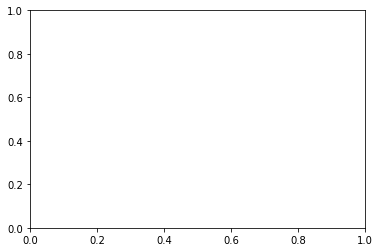

In [7]:
fig, ax = plt.subplots()

In [8]:
#checking out the worldwide distribution of happiness

data6 = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           text = df['Country'],
              z = df['Happiness Rank'], 
          colorscale = 'Viridis', reversescale = False)
layout = dict(title = 'Happiness Rank Across the World', 
             geo = dict(showframe = False, 
                       projection = {'type': 'mercator'}))
choromap6 = go.Figure(data = [data6], layout=layout)
iplot(choromap6)
fig.show("notebook")

C:\Users\shiva\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



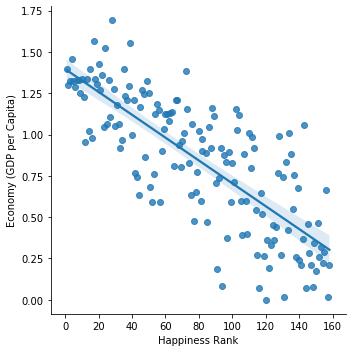

In [9]:
sns.lmplot(x='Happiness Rank', y='Economy (GDP per Capita)', data=df)

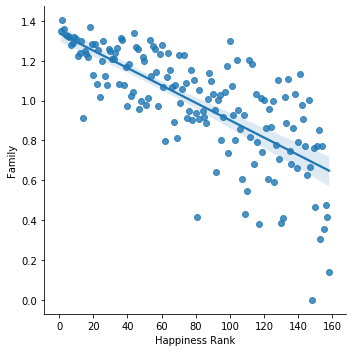

In [10]:
sns.lmplot(x='Happiness Rank', y='Family', data=df)

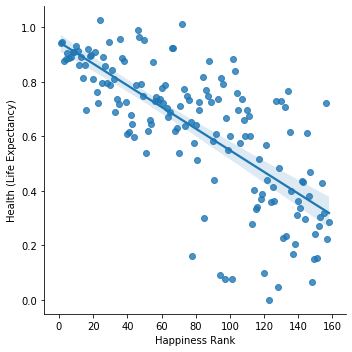

In [11]:
sns.lmplot(x='Happiness Rank', y='Health (Life Expectancy)', data=df)

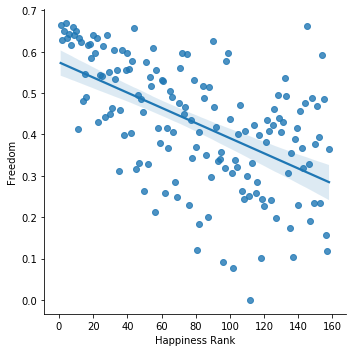

In [12]:
sns.lmplot(x='Happiness Rank', y='Freedom', data=df)

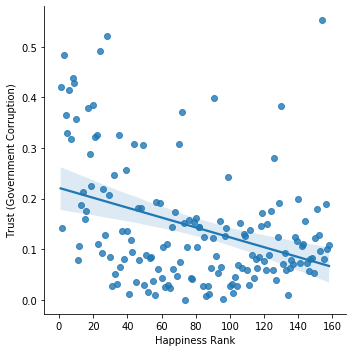

In [13]:
sns.lmplot(x='Happiness Rank', y='Trust (Government Corruption)', data=df)

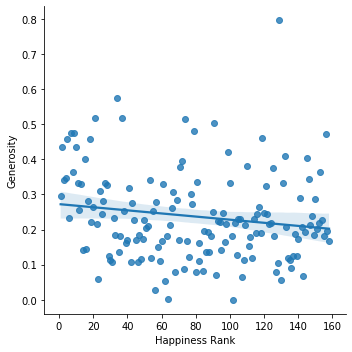

In [14]:
sns.lmplot(x='Happiness Rank', y='Generosity', data=df)

## we can infer from the above regression plots that happiness score/rank has a strong linear relationship with the attributes.

In [15]:
above_mean = ['above mean HS' if i>=5.375734 else 'below mean HS' for i in df['Happiness Score']]
sd = pd.DataFrame({'Happiness Score':above_mean})
sd.head()

,Happiness Score
0,above mean HS
1,above mean HS
2,above mean HS
3,above mean HS
4,above mean HS


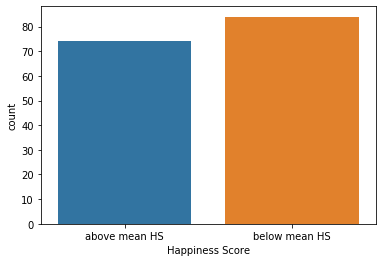

In [16]:
sns.countplot(sd['Happiness Score'])

So, we can see that the distribution of countries is balanced between above and below mean

In [17]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

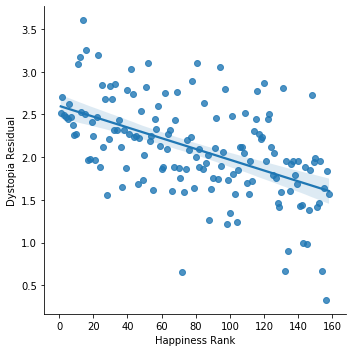

In [18]:
sns.lmplot(x='Happiness Rank', y='Dystopia Residual', data=df);

In [19]:
#feature engineering

In [20]:
df['Region'].nunique()

10

In [21]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
df['Region'] = l.fit_transform(df['Region'])

In [22]:
df = df.drop(['Country'], axis=1)

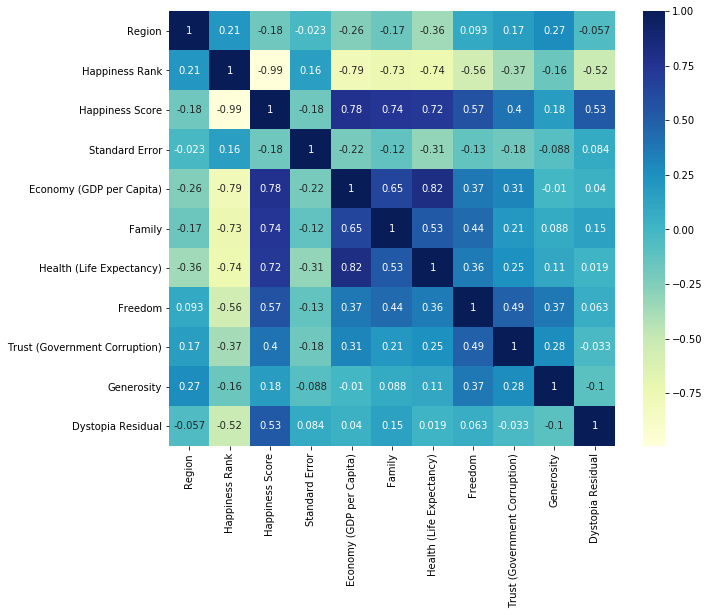

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)

In [24]:
#since happiness rank has negative correlation with many attributes, so we will drop it
df = df.drop(['Happiness Rank'], axis=1)

In [25]:
df.shape

(158, 10)

In [26]:
#checking and removing outliers and skewness
df.skew()

Region                          -0.116119
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [27]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df = df[(z<3).all(axis=1)]

In [28]:
df.skew()

Region                          -0.096985
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

In [29]:
df.shape

(149, 10)

In [30]:
a = df.copy()

In [31]:
a.skew()

Region                          -0.096985
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

In [32]:
for col in a.columns:
    if a.skew().loc[col]<-0.55:
            a[col] = np.square(a[col])

In [33]:
a.skew()

Region                          -0.096985
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.239633
Health (Life Expectancy)        -0.056315
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

In [34]:
for col in a.columns:
    if a.skew().loc[col]>0.55:
        while a.skew().loc[col]>0.55:
            a[col] = np.log1p(a[col]) 

In [35]:
a.skew()

Region                          -0.096985
Happiness Score                  0.169740
Standard Error                   0.538286
Economy (GDP per Capita)        -0.390657
Family                          -0.239633
Health (Life Expectancy)        -0.056315
Freedom                         -0.400867
Trust (Government Corruption)    0.504714
Generosity                       0.433539
Dystopia Residual               -0.021144
dtype: float64

In [36]:
a.head()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,7.587,0.024836,1.39651,1.821177,0.886290,0.66557,0.190351,0.259884,2.51738
1,9,7.561,0.031843,1.30232,1.966249,0.898401,0.62877,0.099878,0.362070,2.70201
2,9,7.527,0.024392,1.32548,1.851178,0.764995,0.64938,0.202964,0.293706,2.49204
3,9,7.522,0.027237,1.45900,1.771428,0.783597,0.66973,0.177867,0.297872,2.46531
4,5,7.427,0.025582,1.32629,1.749297,0.820166,0.63297,0.168780,0.377141,2.45176


## machine learning 

In [37]:
X_old = a.drop(['Happiness Score'], axis=1)
y = a['Happiness Score']

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X_old)
X = pd.DataFrame(X, columns=X_old.columns)

In [39]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print(r2_score(y_test, pred))

0.9957771240482556


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=81)
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
r2_score(y_test, pred)

0.9976453060998176

In [42]:
cross_val_score(lr, X_train,y_train, cv=5, scoring='r2').mean()

0.995399068593778

In [43]:
cross_val_score(lr, X_test,y_test, cv=5, scoring='r2').mean()

0.9975604269707065

We have got a very good prediction as can be seen from the r2 score and the model is not over/under
fitting as well. So, moving onto interpreting the coefficients.

In [44]:
print(f'estimated intercept is {lr.intercept_}')

estimated intercept is 5.426248513217546


In [45]:
print(f'the coefficients are {lr.coef_}')

the coefficients are [-0.03398354  0.00264802  0.38508479  0.24868667  0.24180937  0.14326286
  0.09962578  0.12657334  0.51621886]


In [46]:
df_coef = pd.DataFrame(lr.coef_,index=X.columns, columns=['Coef'])

In [47]:
df_coef

,Coef
Region,-0.033984
Standard Error,0.002648
Economy (GDP per Capita),0.385085
Family,0.248687
Health (Life Expectancy),0.241809
Freedom,0.143263
Trust (Government Corruption),0.099626
Generosity,0.126573
Dystopia Residual,0.516219


Text(0.5, 1.0, 'Predicted happiness score vs actual happiness score')

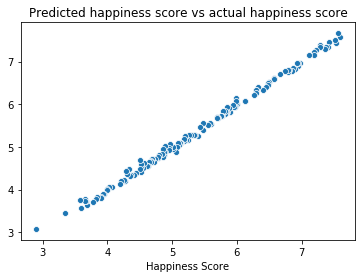

In [48]:
#plotting actual vs predicted values to see whether predictions are correct or not
sns.scatterplot(x=df['Happiness Score'], y=lr.predict(X))
plt.title('Predicted happiness score vs actual happiness score')

In [49]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test, pred)))

0.04825955751668974


In [50]:
#saving model
from sklearn.externals import joblib
joblib.dump(lr, 'happiness.pkl')

C:\Users\shiva\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.



['happiness.pkl']